In [1]:
import tensorflow as tf
import cv2 as cv

2023-09-30 20:58:03.104237: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-30 20:58:03.144886: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-30 20:58:03.144934: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-30 20:58:03.144961: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-30 20:58:03.150958: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-30 20:58:03.152451: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
PATH_TO_LABELS = '/home/irizqy/ml_ws/bangkit-ws/data/label_map.pbtxt'
PATH_TO_SAVED_MODEL = "/home/irizqy/Documents/Ubic/detector/exported_models/saved_model"

In [3]:
# Load saved model and build the detection function
APD_detector = tf.saved_model.load(PATH_TO_SAVED_MODEL)

In [437]:
IM_PATH = "data/1MHQJ458VVXV.jpg"

im = cv.imread(IM_PATH);
im_arr = cv.cvtColor(im, cv.COLOR_BGR2RGB)
im_arr = cv.resize(im_arr, (320, 320))

In [438]:
input_tensor = tf.convert_to_tensor(im_arr)
input_tensor = input_tensor[tf.newaxis, ...]
detections = APD_detector(input_tensor)

In [439]:
width, height = (320, 320)

In [440]:
import numpy as np

dets = np.where(detections['detection_scores'][0] >= .5)[0]

In [441]:
dets

array([0, 1, 2])

In [442]:
detections

{'raw_detection_boxes': <tf.Tensor: shape=(1, 12804, 4), dtype=float32, numpy=
 array([[[-0.00678795, -0.00670334,  0.06775103,  0.06040332],
         [-0.02614843, -0.03300124,  0.09892657,  0.09693093],
         [-0.00674603, -0.00739712,  0.04909814,  0.076777  ],
         ...,
         [-0.26138675, -0.7500948 ,  1.636145  ,  1.638286  ],
         [-0.35174352, -0.15729368,  1.6691523 ,  1.2639563 ],
         [-0.4553705 , -0.44455102,  1.861877  ,  1.3946687 ]]],
       dtype=float32)>,
 'detection_multiclass_scores': <tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
 array([[[2.25460110e-03, 2.65817181e-03, 1.12363826e-02, 9.96313095e-01],
         [2.24533328e-03, 5.09874430e-03, 9.93265629e-01, 6.14771321e-02],
         [3.51906684e-03, 8.93154442e-01, 1.39208855e-02, 3.64701613e-03],
         [1.06043532e-03, 1.02697508e-02, 7.45737106e-02, 9.04312491e-01],
         [6.16900949e-03, 2.03222665e-03, 5.44390734e-03, 6.83586523e-02],
         [1.76008511e-03, 6.47987872e-02, 6

In [443]:
detections['detection_scores'][0]

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.9963131 , 0.9932656 , 0.89315444, 0.07457371, 0.06835865,
       0.06479879, 0.06147713, 0.05401858, 0.05361842, 0.05099801,
       0.03486017, 0.02988471, 0.0259592 , 0.02164304, 0.0209331 ,
       0.01923386, 0.01906355, 0.01903051, 0.01863516, 0.01835826,
       0.01818769, 0.01759685, 0.01709149, 0.01644646, 0.01605773,
       0.01604667, 0.01543304, 0.01542807, 0.01515284, 0.01503287,
       0.01496659, 0.01489291, 0.01472609, 0.01424995, 0.01423076,
       0.01393067, 0.01391916, 0.01387338, 0.01381927, 0.01353342,
       0.01352944, 0.01329628, 0.01302231, 0.01245722, 0.0123433 ,
       0.01224728, 0.01214568, 0.01209893, 0.01208208, 0.01202088,
       0.01192142, 0.01177912, 0.01160189, 0.01150524, 0.01115536,
       0.01110801, 0.01078555, 0.01077608, 0.01066538, 0.0106554 ,
       0.01040219, 0.01040043, 0.01039935, 0.01039524, 0.01031246,
       0.01028302, 0.01015201, 0.01008765, 0.00974698, 0.00959674,
       0.00957

In [444]:
label_classes = {
    1: "gloves",
    2: "mask",
    3: "coat"
}

In [445]:
for i in dets:
    ymin, xmin, ymax, xmax = detections['detection_boxes'][0][i]
    raw_label = int(detections['detection_classes'][0][i].numpy())
    score = np.round(detections['detection_scores'][0][i].numpy()  * 100, 1)
    label = label_classes[raw_label]
    (left, right, top, bottom) = (xmin*width, xmax*width, ymin*height, ymax*height)
    cv.rectangle(im_arr, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)
    label_pos = (int(left), int(top)-20)
    cv.putText(im_arr, f"Class: {label}", label_pos, cv.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 2)
    cv.putText(im_arr, f"Confidence: {score}%", (label_pos[0], label_pos[1] + 15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 2)

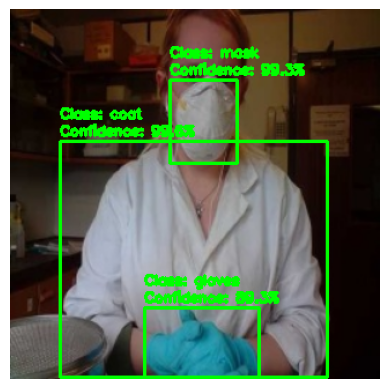

In [446]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(im_arr)